In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Set visualization styles for seaborn

In [38]:
sns.set_style("darkgrid")
sns.set(font_scale=1.5)

In [39]:
# pd.set_option('display.max_columns', None)

# UCLA CHIS Data

### Load Datasets

In [40]:
chis2012 = pd.read_sas("data/chis/2012/adult.sas7bdat")
chis2013 = pd.read_sas("data/chis/2013/adult.sas7bdat")
chis2014 = pd.read_sas("data/chis/2014/adult.sas7bdat")
chis2015 = pd.read_sas("data/chis/2015/adult.sas7bdat")
chis2016 = pd.read_sas("data/chis/2016/adult.sas7bdat")
chis2017 = pd.read_sas("data/chis/2017/adult.sas7bdat")
chis2018 = pd.read_sas("data/chis/2018/adult.sas7bdat")
chis2019 = pd.read_sas("data/chis/2019/adult.sas7bdat")
chis2020 = pd.read_sas("data/chis/2020/adult.sas7bdat")
combinedchis = pd.read_csv("data/combined_chis.csv")

c:\Users\Brian\anaconda3\lib\site-packages\pandas\io\sas\sas7bdat.py:800: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  rslt[name] = self._byte_chunk[jb, :].view(dtype=self.byte_order + "d")
c:\Users\Brian\anaconda3\lib\site-packages\pandas\io\sas\sas7bdat.py:809: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  rslt[name] = self._string_chunk[js, :]


In [41]:
print('CHIS 2012:', chis2012.shape)
print('CHIS 2013:', chis2013.shape)
print('CHIS 2014:', chis2014.shape)
print('CHIS 2015:', chis2015.shape)
print('CHIS 2016:', chis2016.shape)
print('CHIS 2017:', chis2017.shape)
print('CHIS 2018:', chis2018.shape)
print('CHIS 2019:', chis2019.shape)
print('CHIS 2020:', chis2020.shape)

CHIS 2012: (20355, 427)
CHIS 2013: (20724, 421)
CHIS 2014: (19516, 478)
CHIS 2015: (21034, 454)
CHIS 2016: (21055, 488)
CHIS 2017: (21153, 486)
CHIS 2018: (21177, 494)
CHIS 2019: (22160, 559)
CHIS 2020: (21949, 604)


In [42]:
combinedchis

,AA5C,AB1,AB100,AB112,AB113,AB115,AB117,AB118,AB119,AB127,...,SREDUC,AJ153V2_13,AJ154BV2_8,AJ154BV2_9,INS64_S,AK20_P1,AJ174_8,AJ174_9,AJ194_18,T2D
0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,-1.0,5.0,-1.0,-1.0,-1.0,2.0,2.0,2.0,-1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,-1.0,3.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,-1.0,4.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,-1.0,2.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189118,-1.0,2.0,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,-1.0,-1.0,-1.0,5.0,4.0,-1.0,-1.0,-1.0,0.0
189119,-1.0,1.0,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,-1.0,2.0,2.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0
189120,-1.0,2.0,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0
189121,-1.0,3.0,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0


### Check for duplicated ID's to see if a participant shows up in more than one year

In [43]:
combinedchis[combinedchis.duplicated(["PUF1Y_ID"], keep=False)]

,AA5C,AB1,AB100,AB112,AB113,AB115,AB117,AB118,AB119,AB127,...,SREDUC,AJ153V2_13,AJ154BV2_8,AJ154BV2_9,INS64_S,AK20_P1,AJ174_8,AJ174_9,AJ194_18,T2D


### Analyze response variable T2D

In [44]:
combinedchis["T2D"].value_counts()

0.0    169128
1.0     19995
Name: T2D, dtype: int64

In [45]:
classes_df = combinedchis["T2D"].value_counts().rename_axis("class").reset_index(name="counts")
classes_df["proportion"] = classes_df["counts"] / combinedchis.shape[0]
classes_df["percentage"] = classes_df["proportion"] * 100
classes_df

,class,counts,proportion,percentage
0,0.0,169128,0.894275,89.427515
1,1.0,19995,0.105725,10.572485


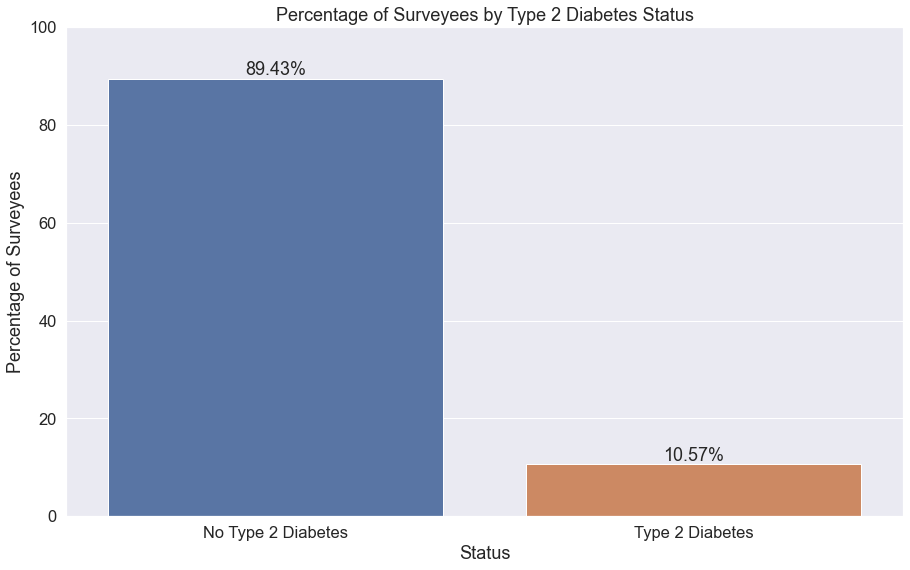

In [116]:
plt.figure(figsize=(15, 9))
g = sns.barplot(x="class", y="percentage", data=classes_df)
g.set_ylim(top=100)
g.set_xticks(range(2))
g.set_xticklabels(["No Type 2 Diabetes", "Type 2 Diabetes"])
g.set_xlabel("Status")
g.set_ylabel("Percentage of Surveyees")
g.set_title("Percentage of Surveyees by Type 2 Diabetes Status")
g.bar_label(g.containers[0], fmt='%.2f%%')
plt.show()

### Type 2 Diabetes With Respect to Age Across Different Years

In [47]:
t2d_df = combinedchis.groupby(["YEAR", "T2D"]).size().to_frame("counts").reset_index()
t2d_df

,YEAR,T2D,counts
0,2012,0.0,18356
1,2012,1.0,1999
2,2013,0.0,18567
3,2013,1.0,2157
4,2014,0.0,17286
5,2014,1.0,2230
6,2015,0.0,18764
7,2015,1.0,2270
8,2016,0.0,18772
9,2016,1.0,2283


### Number of surveyees per year

In [48]:
participants_graph = combinedchis.groupby(["YEAR"]).size().to_frame("counts").reset_index()
participants_graph

,YEAR,counts
0,2012,20355
1,2013,20724
2,2014,19516
3,2015,21034
4,2016,21055
5,2017,21153
6,2018,21177
7,2019,22160
8,2020,21949


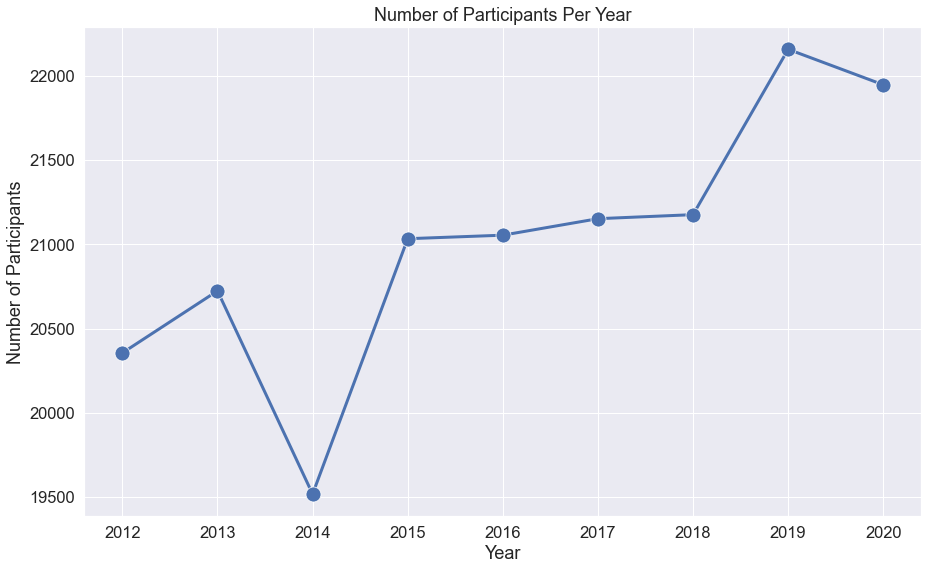

In [49]:
plt.figure(figsize=(15, 9))
g = sns.lineplot(x="YEAR", y="counts", data=participants_graph, marker="o", markersize=15, linewidth=3)
g.set_xlabel("Year")
g.set_ylabel("Number of Participants")
g.set_title("Number of Participants Per Year")
plt.show()

In [50]:
type2diabetes = combinedchis[combinedchis["T2D"] == 1].groupby(["YEAR"])["T2D"].count().reset_index(name="count")
type2diabetes

,YEAR,count
0,2012,1999
1,2013,2157
2,2014,2230
3,2015,2270
4,2016,2283
5,2017,2298
6,2018,2398
7,2019,2242
8,2020,2118


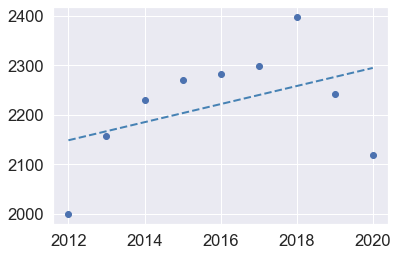

In [51]:
x = type2diabetes["YEAR"]
y = type2diabetes["count"]
a, b = np.polyfit(x, y, 1)
plt.scatter(x="YEAR", y="count", data=type2diabetes)
plt.plot(x, a*x+b, color='steelblue', linestyle='--', linewidth=2)
plt.show()

### Sex of Participants With Type 2 Diabetes Per Year

In [52]:
sex_diabetes_df = combinedchis[combinedchis["T2D"] == 1].groupby(["YEAR", "SRSEX"])["T2D"].count().reset_index(name="count")
sex_diabetes_df

,YEAR,SRSEX,count
0,2012,1.0,906
1,2012,2.0,1093
2,2013,1.0,987
3,2013,2.0,1170
4,2014,1.0,938
5,2014,2.0,1292
6,2015,1.0,1094
7,2015,2.0,1176
8,2016,1.0,1130
9,2016,2.0,1153


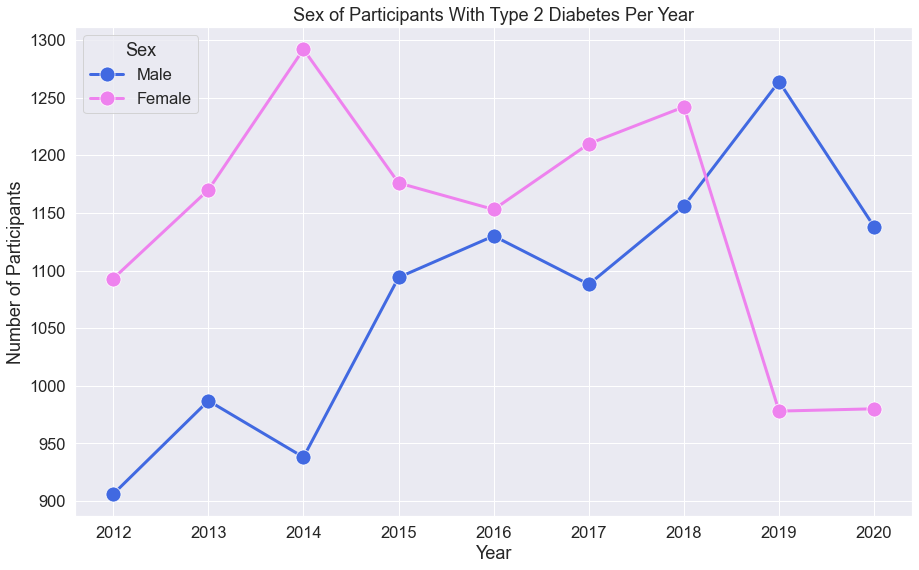

In [53]:
plt.figure(figsize=(15, 9))
sns.lineplot(x="YEAR", y="count", hue="SRSEX", data=sex_diabetes_df, marker="o", markersize=15, linewidth=3, palette=['royalblue', 'violet'])
plt.xlabel("Year")
plt.ylabel("Number of Participants")
plt.title("Sex of Participants With Type 2 Diabetes Per Year")
plt.legend(["Male", "Female"], title="Sex")
plt.show()

### Age Range of Surveyees with Type 2 Diabetes

In [54]:
age_df = combinedchis[combinedchis["T2D"] == 1].groupby(["SRAGE_P1"])["T2D"].count().reset_index(name="count")
age_df

,SRAGE_P1,count
0,18.0,63
1,26.0,68
2,30.0,137
3,35.0,292
4,40.0,516
5,45.0,838
6,50.0,1381
7,55.0,2134
8,60.0,2879
9,65.0,3311


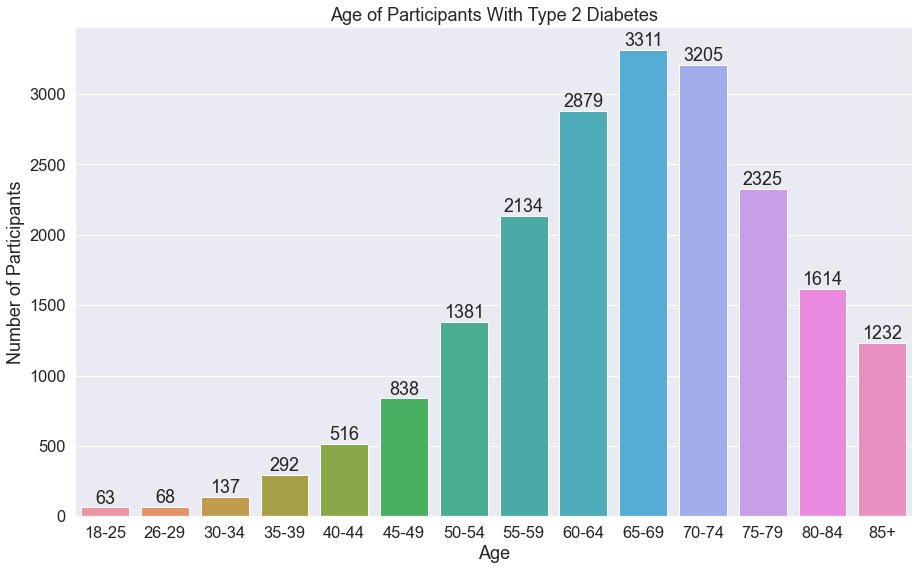

In [55]:
plt.figure(figsize=(15, 9))
g = sns.barplot(x="SRAGE_P1", y="count", data=age_df)
g.set_xlabel("Age")
g.set_ylabel("Number of Participants")
g.set_title("Age of Participants With Type 2 Diabetes")
g.set_xticks(range(14))
g.set_xticklabels(["18-25", "26-29", "30-34", "35-39", "40-44", "45-49", "50-54", "55-59", "60-64", "65-69", "70-74", "75-79", "80-84", "85+"])
g.bar_label(g.containers[0])
plt.show()

In [56]:
age_sex_df = combinedchis[combinedchis["T2D"] == 1].groupby(["SRAGE_P1", "SRSEX"])["T2D"].count().reset_index(name="count")
age_sex_df.head()

,SRAGE_P1,SRSEX,count
0,18.0,1.0,23
1,18.0,2.0,40
2,26.0,1.0,16
3,26.0,2.0,52
4,30.0,1.0,45


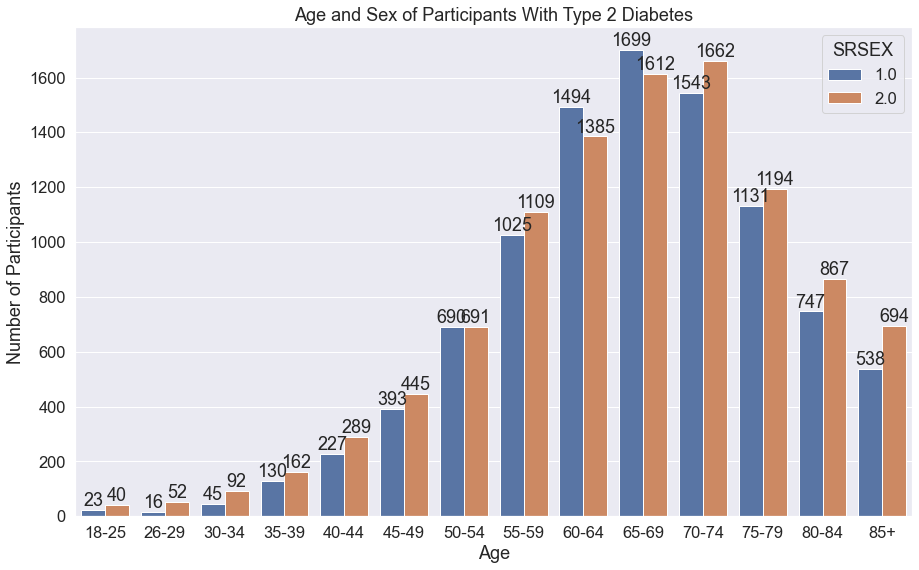

In [57]:
plt.figure(figsize=(15, 9))
g = sns.barplot(x="SRAGE_P1", y="count", hue="SRSEX", data=age_sex_df)
g.set_xlabel("Age")
g.set_ylabel("Number of Participants")
g.set_title("Age and Sex of Participants With Type 2 Diabetes")
g.set_xticks(range(14))
g.set_xticklabels(["18-25", "26-29", "30-34", "35-39", "40-44", "45-49", "50-54", "55-59", "60-64", "65-69", "70-74", "75-79", "80-84", "85+"])
for container in g.containers:
    g.bar_label(container)
plt.show()

### Sex of Surveyees With Type 2 Diabetes

In [58]:
sex_df = combinedchis[combinedchis["T2D"] == 1].groupby(["SRSEX"])["T2D"].count().reset_index(name="count")
sex_df

,SRSEX,count
0,1.0,9701
1,2.0,10294


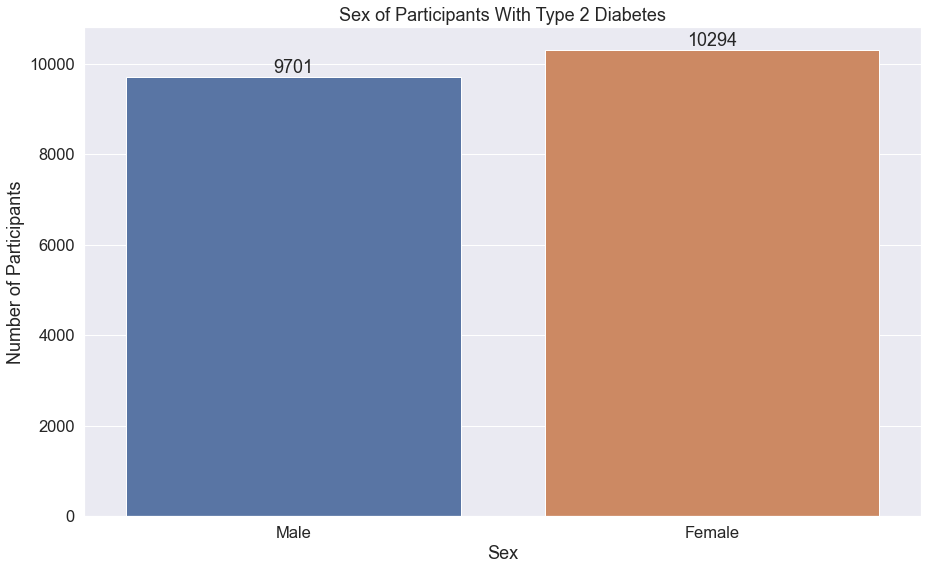

In [59]:
plt.figure(figsize=(15, 9))
g = sns.barplot(x="SRSEX", y="count", data=sex_df)
g.set_xlabel("Sex")
g.set_ylabel("Number of Participants")
g.set_title("Sex of Participants With Type 2 Diabetes")
g.set_xticks(range(2))
g.set_xticklabels(["Male", "Female"])
for container in g.containers:
    g.bar_label(container)
plt.show()

## Average Weight of Participants With/Without Type 2 Diabetes

In [60]:
weight_df = combinedchis.groupby(["YEAR", "T2D"])["WGHTP_P"].mean().reset_index()
weight_df.head()

,YEAR,T2D,WGHTP_P
0,2012,0.0,164.047505
1,2012,1.0,185.723362
2,2013,0.0,166.170410
3,2013,1.0,190.009736
4,2014,0.0,166.140113


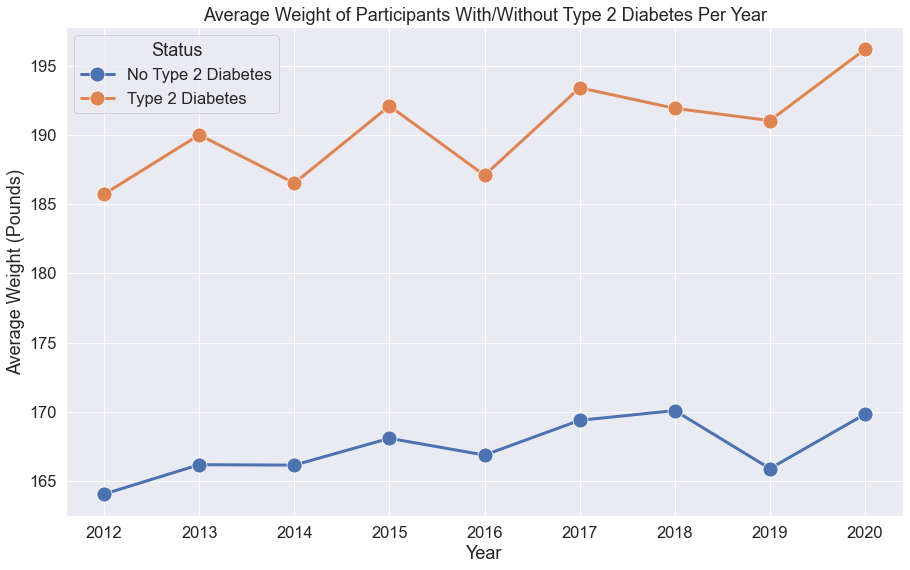

In [61]:
plt.figure(figsize=(15, 9))
sns.lineplot(x="YEAR", y="WGHTP_P", hue="T2D", data=weight_df, marker="o", markersize=15, linewidth=3)
plt.xlabel("Year")
plt.ylabel("Average Weight (Pounds)")
plt.title("Average Weight of Surveyees With/Without Type 2 Diabetes Per Year")
plt.legend(["No Type 2 Diabetes", "Type 2 Diabetes"], title="Status")
plt.show()

## Average BMI of Participants With/Without Type 2 Diabetes

In [62]:
bmi_df = combinedchis.groupby(["YEAR", "T2D"])["BMI_P"].mean().reset_index()
bmi_df.head()

,YEAR,T2D,BMI_P
0,2012,0.0,26.906450
1,2012,1.0,30.535233
2,2013,0.0,26.895464
3,2013,1.0,31.007209
4,2014,0.0,26.950826


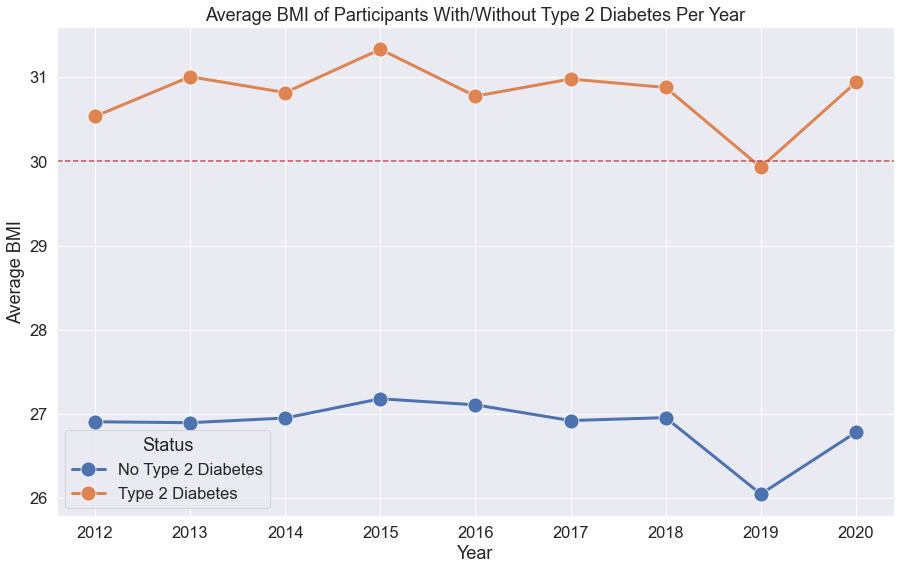

In [63]:
plt.figure(figsize=(15, 9))
sns.lineplot(x="YEAR", y="BMI_P", hue="T2D", data=bmi_df, marker="o", markersize=15, linewidth=3)
plt.axhline(y=30, color='r', linestyle='--', label="Overweight")
plt.xlabel("Year")
plt.ylabel("Average BMI")
plt.title("Average BMI of Surveyees With/Without Type 2 Diabetes Per Year")
plt.legend(["No Type 2 Diabetes", "Type 2 Diabetes"], title="Status")
plt.show()

#### Type 2 Diabetes Status by Age

In [139]:
count_df = combinedchis.groupby(["SRAGE_P1", "T2D"])["T2D"].count().reset_index(name="count")
total_df = count_df.groupby(["SRAGE_P1"])["count"].sum().reset_index(name="total")
age_diabetes = pd.merge(count_df, total_df, on="SRAGE_P1")
age_diabetes["percentage"] = (age_diabetes["count"] / age_diabetes["total"]) * 100
age_diabetes.head()

,SRAGE_P1,T2D,count,total,percentage
0,18.0,0.0,13804,13867,99.545684
1,18.0,1.0,63,13867,0.454316
2,26.0,0.0,6272,6340,98.927445
3,26.0,1.0,68,6340,1.072555
4,30.0,0.0,9071,9208,98.512163


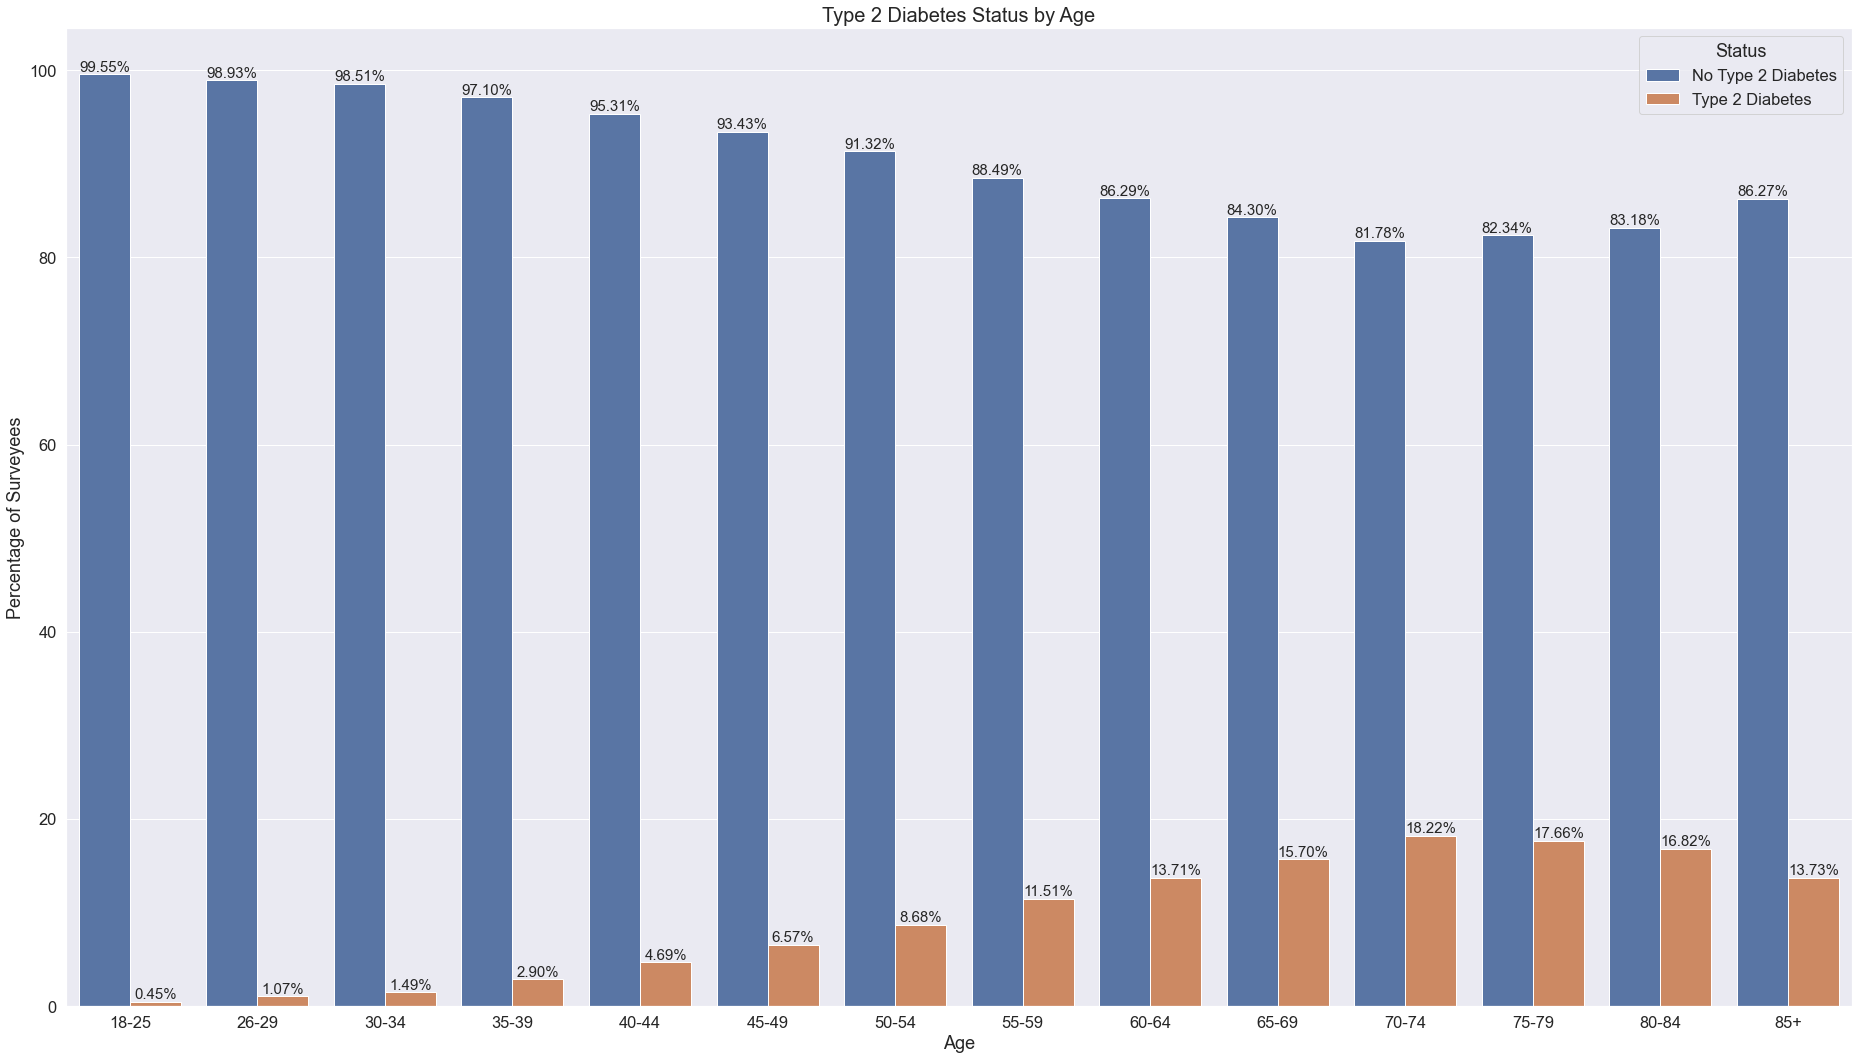

In [140]:
plt.figure(figsize=(32, 18))
g = sns.barplot(x="SRAGE_P1", y="percentage", hue="T2D", data=age_diabetes)
g.set_xlabel("Age")
g.set_ylabel("Percentage of Surveyees")
g.set_title("Type 2 Diabetes Status by Age", fontsize=20)
g.set_xticks(range(14))
g.set_xticklabels(["18-25", "26-29", "30-34", "35-39", "40-44", "45-49", "50-54", "55-59", "60-64", "65-69", "70-74", "75-79", "80-84", "85+"])
hands, labs = g.get_legend_handles_labels()
plt.legend(handles=hands, labels=["No Type 2 Diabetes", "Type 2 Diabetes"], title="Status")
for container in g.containers:
    g.bar_label(container, fmt='%.2f%%', fontsize=15)
plt.show()

In [141]:
count_df = combinedchis.groupby(["SRSEX", "T2D"])["T2D"].count().reset_index(name="count")
total_df = count_df.groupby(["SRSEX"])["count"].sum().reset_index(name="total")
sex_diabetes = pd.merge(count_df, total_df, on="SRSEX")
sex_diabetes["percentage"] = (sex_diabetes["count"] / sex_diabetes["total"]) * 100
sex_diabetes.head()


,SRSEX,T2D,count,total,percentage
0,1.0,0.0,71841,81542,88.103063
1,1.0,1.0,9701,81542,11.896937
2,2.0,0.0,97287,107581,90.431396
3,2.0,1.0,10294,107581,9.568604


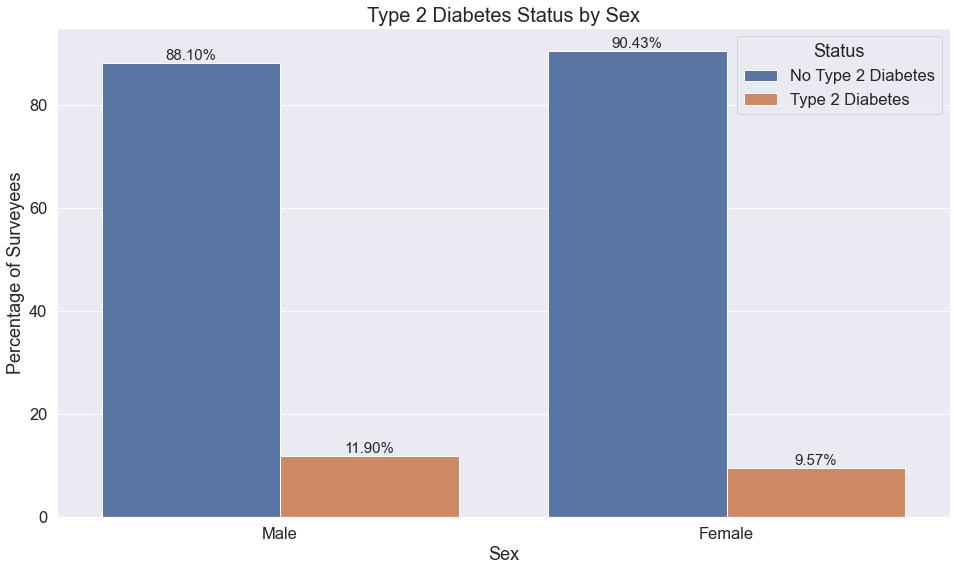

In [142]:
plt.figure(figsize=(16, 9))
g = sns.barplot(x="SRSEX", y="percentage", hue="T2D", data=sex_diabetes)
g.set_xlabel("Sex")
g.set_ylabel("Percentage of Surveyees")
g.set_title("Type 2 Diabetes Status by Sex", fontsize=20)
g.set_xticks(range(2))
g.set_xticklabels(["Male", "Female"])
hands, labs = g.get_legend_handles_labels()
plt.legend(handles=hands, labels=["No Type 2 Diabetes", "Type 2 Diabetes"], title="Status")
for container in g.containers:
    g.bar_label(container, fmt='%.2f%%', fontsize=15)
plt.show()

In [146]:
count_df = combinedchis.groupby(["OMBSRR_P1", "T2D"])["T2D"].count().reset_index(name="count")
total_df = count_df.groupby(["OMBSRR_P1"])["count"].sum().reset_index(name="total")
race_diabetes = pd.merge(count_df, total_df, on="OMBSRR_P1")
race_diabetes["percentage"] = (race_diabetes["count"] / race_diabetes["total"]) * 100
race_diabetes.head()

,OMBSRR_P1,T2D,count,total,percentage
0,1.0,0.0,35985,41058,87.644308
1,1.0,1.0,5073,41058,12.355692
2,2.0,0.0,103335,113978,90.662233
3,2.0,1.0,10643,113978,9.337767
4,3.0,0.0,7330,8707,84.185138


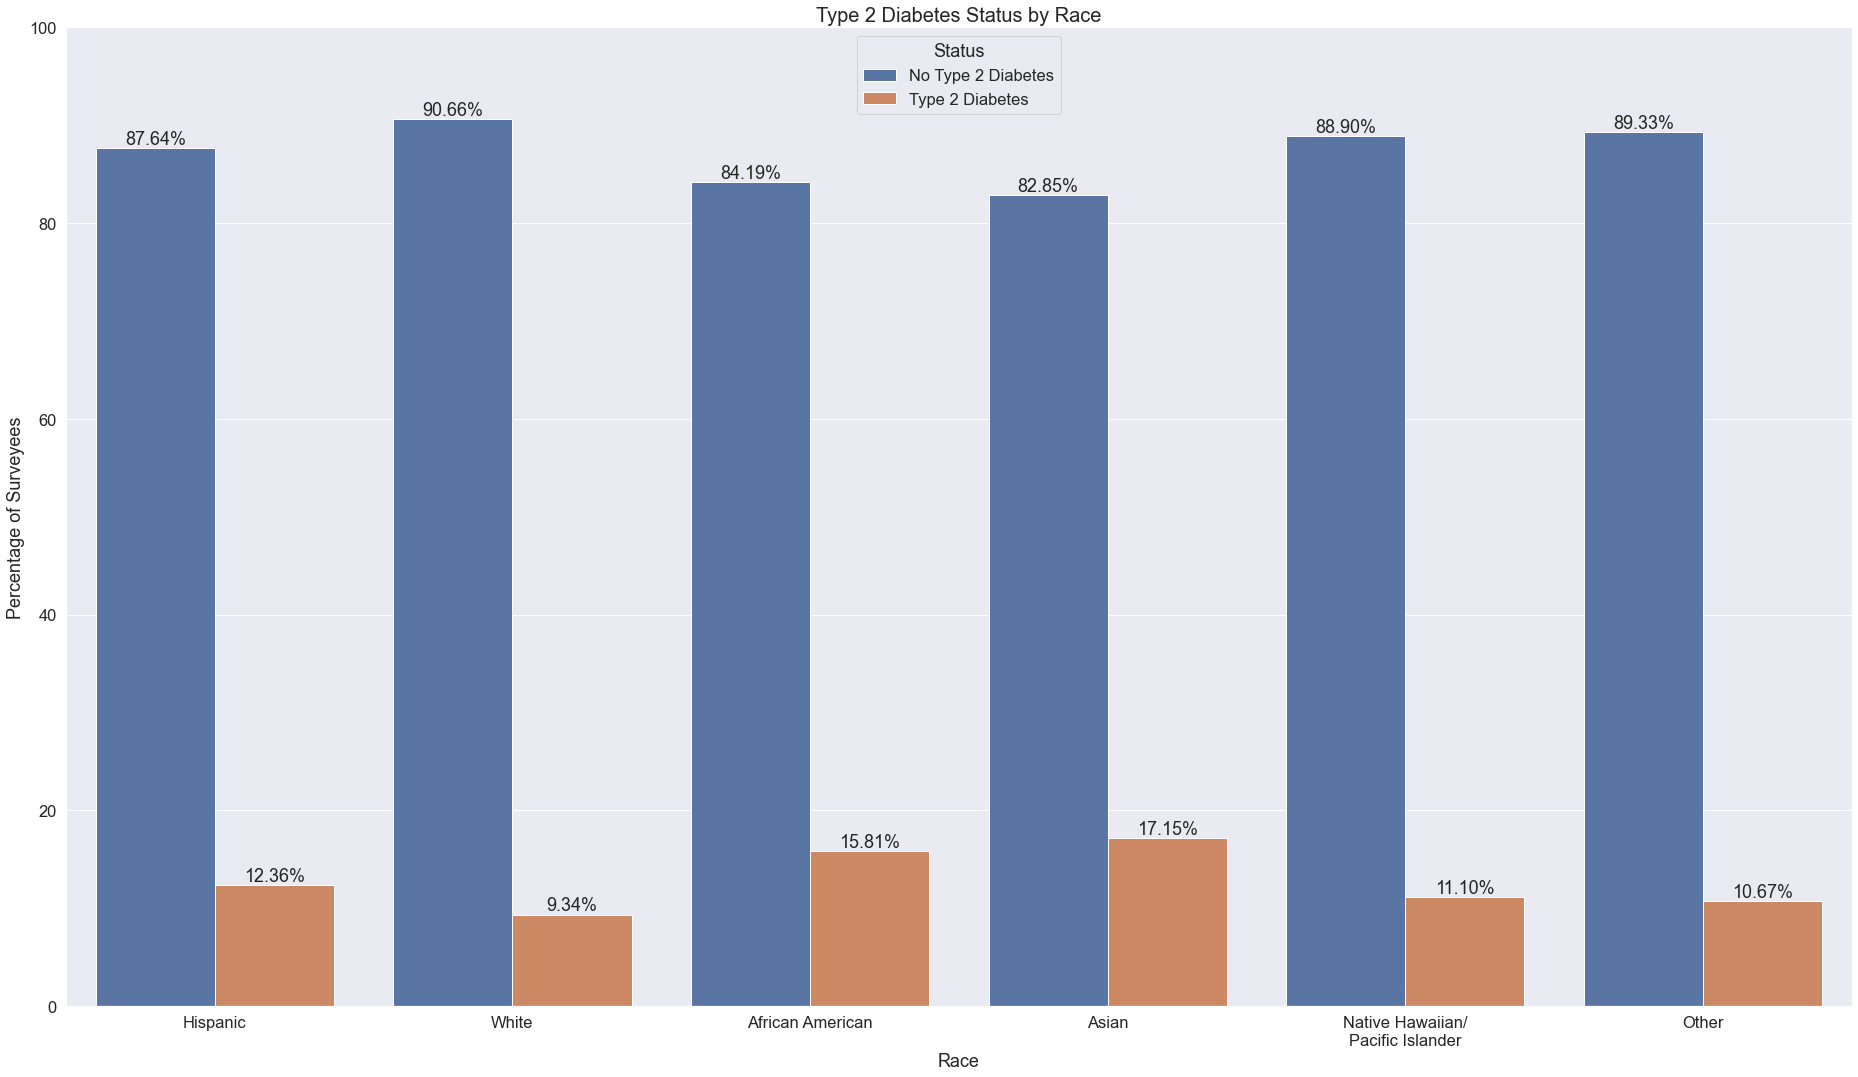

In [162]:
plt.figure(figsize=(32, 18))
g = sns.barplot(x="OMBSRR_P1", y="percentage", hue="T2D", data=race_diabetes)
g.set_xlabel("Race")
g.set_ylabel("Percentage of Surveyees")
g.set_ylim(top=100)
g.set_title("Type 2 Diabetes Status by Race", fontsize=20)
g.set_xticks(range(6))
g.set_xticklabels(["Hispanic", "White", "African American", "Asian", r"Native Hawaiian/""\n"r"Pacific Islander", "Other"])
hands, labs = g.get_legend_handles_labels()
plt.legend(handles=hands, labels=["No Type 2 Diabetes", "Type 2 Diabetes"], title="Status", loc="upper center")
for container in g.containers:
    g.bar_label(container, fmt='%.2f%%', fontsize=18)
plt.show()